# Завдання 1
Протягом 50 років вимірювався рівень води навесні під час повені відносно умовного нуля. Результати вимірювання наведено у вигляді інтервального статистичного розподілу:

| **x_i** | 0-24 | 24-48 | 48-72 | 72-96 | 96-120 | 120-144 | 144-168 | 168-192 | 192-216 |
|:-------:|:----:|:-----:|:-----:|:-----:|:------:|:-------:|:-------:|:-------:|:-------:|
| **n_i** |   1  |   2   |   4   |   6   |   12   |    16   |    6    |    2    |    1    |

За заданими статистичними розподілами вибірки висунути $H_0$ про закон розподілу ознаки генеральної сукупності і при рівні значущості $\alpha = 0.01$ перевірити її правильність.

## Рішення
1. Розрахуємо статистики:

In [130]:
import numpy as np

x_i = [[0, 24], [24, 48], [48, 72], [72, 96], [96, 120], [120, 144], [144, 168], [168, 192], [192, 216]]
x = np.array([(item[1] + item[0])/2 for item in x_i])
n = np.array([1, 2, 4, 6, 12, 16, 6, 2, 1])

mean_x = sum(x * n / sum(n))
mean_x

var_x = sum(x**2 * n) / sum(n) - mean_x**2
var_x

sd_x = var_x ** (1/2)
sd_x

print(f'Середнє значення = {mean_x}\n'
      f'Дисперсія = {round(var_x, 2)}\n'
      f'Стандартне відхилення = {round(sd_x, 2)}')

Середнє значення = 114.72
Дисперсія = 1452.44
Стандартне відхилення = 38.11


2. Побудуємо гістограму:

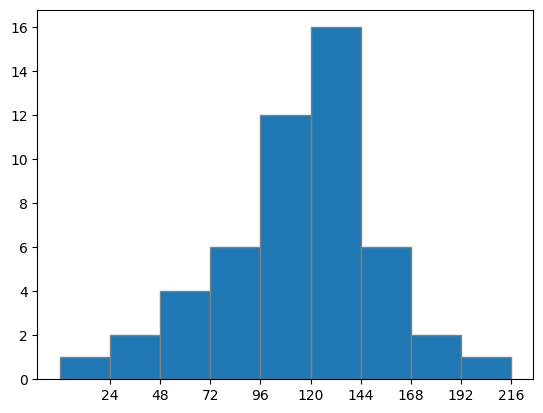

Можна висунути гіпотезу про нормальність розподілу вибірки.


In [131]:
import matplotlib.pyplot as plt

plt.bar(x, n, width=24, edgecolor='gray')
plt.xticks(x+12)
plt.show()

print('Можна висунути гіпотезу про нормальність розподілу вибірки.')

3. Перевіримо гіпотезу за критерієм узгодженості Пірсона

In [132]:
import pandas as pd
import scipy as sp
from IPython.display import Markdown as md
from IPython.display import display

data = pd.DataFrame({'x_lower': [item[0] for item in x_i],
                     'x_upper': [item[1] for item in x_i],
                     'n': n})

# Нижня межа Z-значення
data['Z_upper'] = (data['x_upper'] - mean_x) / sd_x

# Верхня межа Z-значення
data['Z_lower'] = data['Z_upper'].shift(1)

# Зміна позиції стовпчика
data = data.iloc[:, [0, 1, 2, 4, 3]]

# Форматування безконечності
data.iloc[0, 3] = -np.inf
data.iloc[8, 4] = np.inf

# Нижня межа F-значення
data['F_lower'] = [sp.stats.norm.cdf(data.loc[i, 'Z_lower']) - 0.5 for i in range(len(data['Z_lower']))]

# Верхня межа F-значення
data['F_upper'] = data['F_lower'].shift(-1)

# Корегування значення
data.iloc[8, 6] = 0.5

# Розрахунок P-значення
data['P'] = data['F_upper'] - data['F_lower']

# Розрахунок теоретичної частоти
data['N'] = data['P']*sum(data['n'])

# Критерії узгодженості
data['K'] = (data['n'] - data['N'])**2 / data['N']

# Демонстрація таблиці
display(data)

# Критерій узгодженості Пірсона
K = sum(data['K'])

# Табличне значення Хі-квадрат
Chi2 = sp.stats.chi2.ppf(0.99, len(x)-2-1)

# Висновок
md(f'Відповідь: оскільки  критичне значення $K_к(${round(Chi2, 2)}) >  $K_e(${round(K, 2)}) ми не маємо підстав відхилити гіпотезу $H_0$ про нормальність розподілу вибірки.')

,x_lower,x_upper,n,Z_lower,Z_upper,F_lower,F_upper,P,N,K
0,0,24,1,-inf,-2.380421,-0.500000,-0.491354,0.008646,0.432322,0.745412
1,24,48,2,-2.380421,-1.750680,-0.491354,-0.459999,0.031354,1.567705,0.119205
2,48,72,4,-1.750680,-1.120939,-0.459999,-0.368843,0.091156,4.557820,0.068270
3,72,96,6,-1.120939,-0.491198,-0.368843,-0.188357,0.180486,9.024314,1.013537
4,96,120,12,-0.491198,0.138543,-0.188357,0.055094,0.243451,12.172556,0.002446
5,120,144,16,0.138543,0.768284,0.055094,0.278841,0.223746,11.187319,2.070371
6,144,168,6,0.768284,1.398025,0.278841,0.418947,0.140106,7.005323,0.144272
7,168,192,2,1.398025,2.027766,0.418947,0.478708,0.059761,2.988036,0.326708
8,192,216,1,2.027766,inf,0.478708,0.500000,0.021292,1.064604,0.003920


Відповідь: оскільки  критичне значення $K_к($16.81) >  $K_e($4.49) ми не маємо підстав відхилити гіпотезу $H_0$ про нормальність розподілу вибірки.